In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
/content/drive/MyDrive/Projects/Signatures/signature.py
/content/drive/MyDrive/Projects/Signatures/Fonts

In [ ]:
%run D:/Projects/SignatureProject/signature.py

In [15]:
%run /content/drive/MyDrive/Projects/Signatures/signature.py

In [17]:
sig_gen = Signature_Generator(name=generate_random_string())
sig_gen.remove_all()
# sig_gen.create_multiple()

/content/drive/MyDrive/Projects/Signatures/Fonts/


<Axes: ylabel='Frequency'>

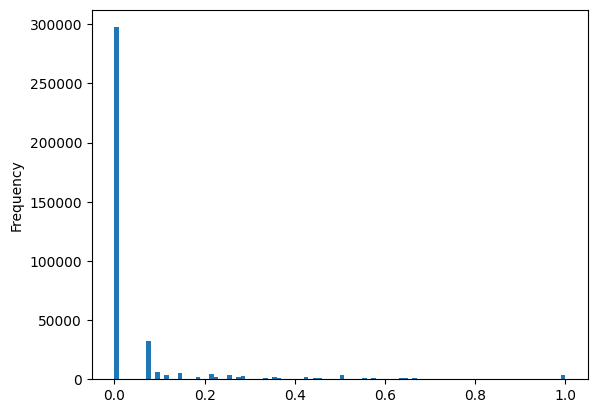

In [5]:
signatures=sig_gen.ground_truth_score()
signatures["y"]=(signatures["similarity"]>0.75)*1
d_Good=signatures[signatures["y"]==1]
d_Bad =signatures[signatures["y"]==0]
d_sample=pd.concat([d_Bad.sample(frac=3*d_Good.shape[0]/d_Bad.shape[0]),d_Good])
d_sample=d_sample.sample(frac=1)
d_sample.shape
signatures['similarity'].plot(kind='hist',bins=100)

In [6]:
d_sample

,Signature_1,Signature_2,similarity,y
245323,d9Q271sOK2cJQU_0.png,UflaHhuao_4.png,0.000000,0
49808,vD1apw1wn_0.png,AJ5t3eQoPOzpgK_4.png,0.000000,0
257507,geWJ71scKtuUQy_1.png,geWJ71scKtuUQy_0.png,1.000000,1
227074,d9WR71sOKB0Jsx_0.png,d9nZ71scKV0CPx_3.png,0.571429,0
359922,gT5kw9wLGuJ_2.png,wl69_1.png,0.000000,0
...,...,...,...,...
195900,orwp_3.png,RMwp_1.png,0.500000,0
277003,lvyZpnFeq0DJQx_3.png,UflapQdZc_6.png,0.071429,0
82798,AJ5t30QoPOrNgK_3.png,AJ5t30QoPOzhgK_6.png,0.857143,1
145487,CJ9S3voFi96h0R_2.png,AJqt30HoPSLhg7_6.png,0.214286,0


In [53]:
%run /content/drive/MyDrive/Projects/Signatures/signature.py

In [8]:
from sklearn.model_selection import train_test_split
Train, Valid = train_test_split(d_sample, test_size=0.2, stratify=d_sample["y"], random_state=42)
siamese=Signature_Siamese_Network(input_shape=(100,400,1))
# siamese.load()
siamese.fit(Train=Train[:100],Valid=Valid[:25],epochs=10)
siamese.save()

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 10s/step - accuracy: 0.4502 - loss: 0.6695 - val_accuracy: 0.8000 - val_loss: 0.4974
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 43s 10s/step - accuracy: 0.7344 - loss: 0.5554 - val_accuracy: 0.8000 - val_loss: 0.5196
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 75s 8s/step - accuracy: 0.7602 - loss: 0.3914 - val_accuracy: 0.8000 - val_loss: 0.4870
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.8242 - loss: 0.3538 - val_accuracy: 0.8000 - val_loss: 0.4827
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 33s 8s/step - accuracy: 0.9324 - loss: 0.2240 - val_accuracy: 0.8000 - val_loss: 0.5154
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 0.9847 - loss: 0.1320 - val_accuracy: 0.8000 - val_loss: 0.5517
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 41s 8s/step - accuracy: 1.0000 - loss: 0.0583 - val_accuracy: 0.8000 - val_loss: 0.6104
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 40s 8s/step - accuracy: 1.0000 - loss: 0.0550 - val_accuracy: 0.8000 - val_loss: 0.6855
Epoch 

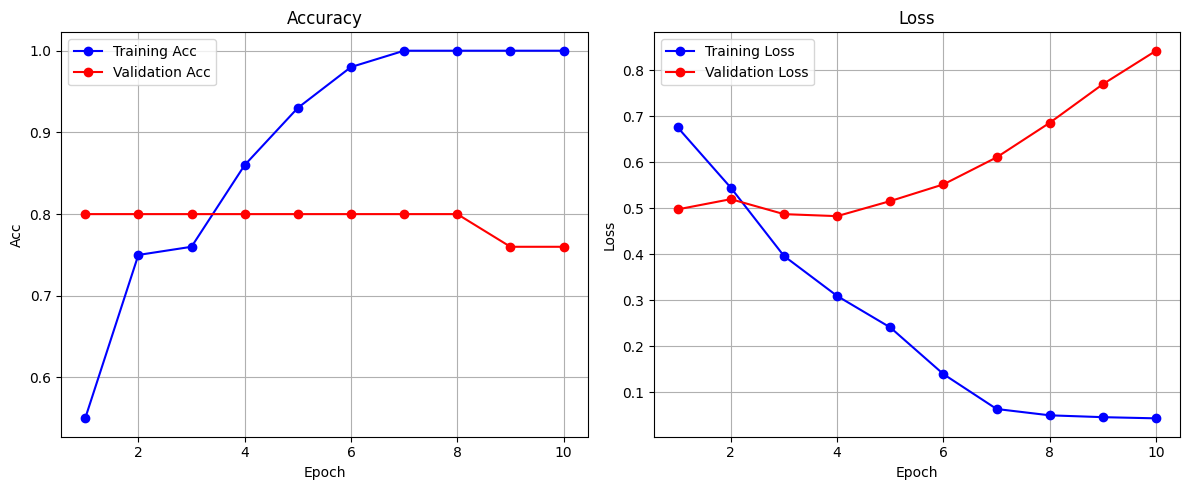

In [11]:
siamese.plot_history(siamese.model.history)

In [ ]:
img2 = siamese.load_gray("Signatures/LYWEAbl53932jBL_2.png") / 255.0
img2.shape

(100, 400)

In [58]:


# X_t,y_t=siamese.return_images(Train[:2])
siamese.predict(Train[:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


array([0.035699  , 0.08932853], dtype=float32)

In [16]:
siamese.signatures_folder

'/content/drive/MyDrive/Projects/Signatures/Signatures/'

In [46]:
siamese.model.layers

[<InputLayer name=input_layer_4, built=True>,
 <InputLayer name=input_layer_5, built=True>,
 <Functional name=base_cnn, built=True>,
 <Lambda name=lambda_1, built=True>,
 <Dense name=dense_3, built=True>]

In [ ]:
import os
import matplotlib.pyplot as plt

class StructuralModelExplainer:
    def __init__(self, model, input_shape, model_name="SiameseModel"):
        self.model = model
        self.input_shape = input_shape
        self.model_name = model_name
        self._results = {}

    def weight_norm_importance(self):
        summary = []
        for layer in self.model.layers:
            if hasattr(layer, "weights") and layer.weights:
                try:
                    weights = layer.get_weights()[0]
                    l2_norm = np.linalg.norm(weights)
                    summary.append((layer.name, weights.shape, l2_norm))
                except:
                    continue
        df = pd.DataFrame(summary, columns=["Layer", "Shape", "L2 Norm"])
        self._results["weight_norm"] = df
        return df

    def activation_maximization(self, target_layer_name, steps=100, lr=1.0):
        input_img = tf.Variable(np.random.normal(size=(1, *self.input_shape)).astype(np.float32))
        sub_model = Model(inputs=self.model.input[0], outputs=self.model.get_layer(target_layer_name).output)

        for _ in range(steps):
            with tf.GradientTape() as tape:
                activation = sub_model(input_img)
                loss = tf.reduce_mean(activation)
            grads = tape.gradient(loss, input_img)
            input_img.assign_add(lr * tf.math.l2_normalize(grads))

        result = tf.clip_by_value(input_img[0], 0.0, 1.0).numpy()
        self._results["activation_max"] = result
        return result

    def fisher_information(self):
        dummy_input = tf.constant(np.random.normal(size=(1, *self.input_shape)).astype(np.float32))
        output = self.model([dummy_input, dummy_input])
        gradients = tf.gradients(output, self.model.trainable_weights)

        info = []
        for w, g in zip(self.model.trainable_weights, gradients):
            if g is not None:
                fisher_score = tf.reduce_mean(tf.square(g)).numpy()
                info.append((w.name, w.shape.as_list(), fisher_score))
        df = pd.DataFrame(info, columns=["Weight Name", "Shape", "Fisher Info"])
        self._results["fisher"] = df
        return df

    def neuron_ablation_study(self):
        dummy_input = np.ones(self.input_shape, dtype=np.float32)[np.newaxis, ...]
        base_output = self.model.predict([dummy_input, dummy_input])
        results = []

        for layer in self.model.layers:
            if not hasattr(layer, "get_weights") or not layer.get_weights():
                continue
            original_weights = layer.get_weights()
            zeroed_weights = [np.zeros_like(w) for w in original_weights]
            try:
                layer.set_weights(zeroed_weights)
                altered_output = self.model.predict([dummy_input, dummy_input])
                delta = np.linalg.norm(base_output - altered_output)
                results.append((layer.name, delta))
            except:
                continue
            finally:
                layer.set_weights(original_weights)

        df = pd.DataFrame(results, columns=["Layer", "Δ Output Norm (Ablation)"])
        self._results["ablation"] = df
        return df

    def filter_fourier_analysis(self):
        summary = []
        for layer in self.model.layers:
            if isinstance(layer, tf.keras.layers.Conv2D):
                try:
                    filters = layer.get_weights()[0]
                    fft = np.fft.fft2(filters, axes=(0, 1))
                    magnitude = np.abs(fft)
                    avg_magnitude = np.mean(magnitude)
                    summary.append((layer.name, filters.shape, avg_magnitude))
                except:
                    continue
        df = pd.DataFrame(summary, columns=["Layer", "Shape", "Avg FFT Magnitude"])
        self._results["fft"] = df
        return df

    def visualize_all(self):
        if "weight_norm" in self._results:
            df = self._results["weight_norm"]
            plt.figure(figsize=(10, 4))
            plt.bar(df["Layer"], df["L2 Norm"])
            plt.xticks(rotation=45, ha="right")
            plt.title("Layer Weight Norms (L2)")
            plt.ylabel("L2 Norm")
            plt.tight_layout()
            plt.show()

        if "fft" in self._results:
            df = self._results["fft"]
            plt.figure(figsize=(10, 4))
            plt.bar(df["Layer"], df["Avg FFT Magnitude"])
            plt.xticks(rotation=45, ha="right")
            plt.title("Fourier Frequency Response")
            plt.ylabel("Avg. FFT Magnitude")
            plt.tight_layout()
            plt.show()

        if "ablation" in self._results:
            df = self._results["ablation"]
            plt.figure(figsize=(10, 4))
            plt.bar(df["Layer"], df["Δ Output Norm (Ablation)"])
            plt.xticks(rotation=45, ha="right")
            plt.title("Neuron Ablation Impact")
            plt.ylabel("||ΔOutput||")
            plt.tight_layout()
            plt.show()

        if "activation_max" in self._results:
            plt.figure(figsize=(6, 2))
            plt.imshow(self._results["activation_max"].squeeze(), cmap='gray')
            plt.title("Activation Maximization")
            plt.axis("off")
            plt.tight_layout()
            plt.show()

    def get_all_results(self):
        return self._results


In [ ]:
# 1. Weight norm ranking
df_norms = weight_norm_importance(siamese.model)

# 2. Activation maximization for a conv layer
img = activation_maximization(siamese.model, target_layer_name="conv2d_1", input_shape=(100, 400, 1))

# 3. Fisher information
df_fisher = fisher_information(siamese.model, input_shape=(100, 400, 1))

# 4. Neuron ablation effect
df_ablation = neuron_ablation_study(siamese.model, input_shape=(100, 400, 1))

# 5. Fourier analysis of filters
df_fft = filter_fourier_analysis(siamese.model)


In [48]:
def compute_gradcam(siamese_model: Signature_Siamese_Network,
                    image_path_1: str,
                    image_path_2: str,
                    layer_name: str = "conv2d_2",
                    show=True) -> Tuple[np.ndarray, float]:
    """
    Computes Grad-CAM heatmap for one of the inputs of a Siamese network.

    Args:
        siamese_model: Trained Signature_Siamese_Network
        image_path_1: Path to signature image A
        image_path_2: Path to signature image B
        layer_name: Last convolutional layer to extract gradients from
        show: Whether to plot the output

    Returns:
        heatmap: The computed Grad-CAM heatmap
        pred_score: The predicted similarity score
    """
    # Prepare input
    img_A = siamese_model.load_gray(image_path_1) / 255.0
    img_B = siamese_model.load_gray(image_path_2) / 255.0
    img_A = img_A.reshape((1,) + siamese_model.input_shape)
    img_B = img_B.reshape((1,) + siamese_model.input_shape)

    # Access the shared encoder and specific layer
    encoder = siamese_model.model.layers[2]
    grad_model = Model(inputs=encoder.input,
                       outputs=[encoder.get_layer(layer_name).output, encoder.output])

    # Forward + backward pass to get gradients
    with tf.GradientTape() as tape:
        conv_outputs, features = grad_model(img_A)
        pred_A = siamese_model.model([img_A, img_B], training=False)
        loss = pred_A[0][0]  # scalar similarity score

    grads = tape.gradient(loss, conv_outputs)[0]  # (H, W, C)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1))  # (C,)

    # Multiply each channel by "how important it is"
    cam = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs[0]), axis=-1)

    # Normalize heatmap
    heatmap = tf.maximum(cam, 0) / tf.reduce_max(cam)
    heatmap = heatmap.numpy()
    heatmap = np.uint8(255 * heatmap)
    heatmap = Image.fromarray(heatmap).resize((img_A.shape[2], img_A.shape[1]))
    heatmap = np.array(heatmap)

    # Overlay on original image
    if show:
        img_display = np.squeeze(img_A[0], axis=-1)
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(img_display, cmap='gray')
        plt.imshow(heatmap, cmap='jet', alpha=0.5)
        plt.title(f"Grad-CAM - Signature A\nPredicted Similarity: {loss:.2f}")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(img_B[0, :, :, 0], cmap="gray")
        plt.title("Signature B")
        plt.axis("off")
        plt.tight_layout()
        plt.show()

    return heatmap, loss
data_x=Train.T.to_dict()

data=data_x[list(data_x)[4]]

compute_gradcam(siamese,siamese.signatures_folder+data['Signature_1'],siamese.signatures_folder+data['Signature_2'])
data

TypeError: 'NoneType' object is not subscriptable

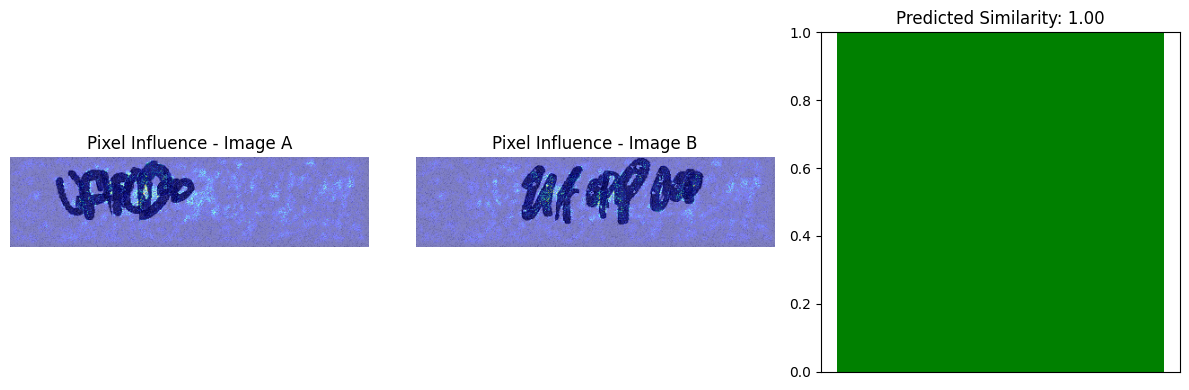

{'Signature_1': 'UflapQ0ao_0.png',
 'Signature_2': 'UUlapQ0ao_3.png',
 'similarity': 0.8888888888888888,
 'y': 1}

In [44]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def compute_pixel_importance_map(siamese_model: Signature_Siamese_Network,
                                 image_path_1: str,
                                 image_path_2: str,
                                 show=True) -> Tuple[np.ndarray, np.ndarray, float]:
    """
    Computes pixel importance (saliency map) of Signature_1 w.r.t. Siamese output similarity.

    Returns:
        - Gradients as heatmap for image 1 and image 2
        - Predicted similarity score
    """
    # Load and normalize images
    img_A = siamese_model.load_gray(image_path_1) / 255.0
    img_B = siamese_model.load_gray(image_path_2) / 255.0

    img_A = img_A.reshape((1,) + siamese_model.input_shape)
    img_B = img_B.reshape((1,) + siamese_model.input_shape)

    # Convert to tf.Variable for gradient tracking
    img_A_var = tf.Variable(img_A, dtype=tf.float32)
    img_B_var = tf.Variable(img_B, dtype=tf.float32)

    with tf.GradientTape(persistent=True) as tape:
        pred = siamese_model.model([img_A_var, img_B_var], training=False)

    # Compute gradient of output w.r.t. each input
    grad_A = tape.gradient(pred, img_A_var)[0].numpy()
    grad_B = tape.gradient(pred, img_B_var)[0].numpy()

    heatmap_A = np.abs(grad_A).mean(axis=-1)
    heatmap_B = np.abs(grad_B).mean(axis=-1)

    if show:
        fig, axes = plt.subplots(1, 3, figsize=(12, 4))
        axes[0].imshow(img_A[0, :, :, 0], cmap="gray")
        axes[0].imshow(heatmap_A, cmap="jet", alpha=0.5)
        axes[0].set_title("Pixel Influence - Image A")
        axes[0].axis("off")

        axes[1].imshow(img_B[0, :, :, 0], cmap="gray")
        axes[1].imshow(heatmap_B, cmap="jet", alpha=0.5)
        axes[1].set_title("Pixel Influence - Image B")
        axes[1].axis("off")

        axes[2].bar([0], [pred[0][0]], color='green')
        axes[2].set_ylim(0, 1)
        axes[2].set_title(f"Predicted Similarity: {pred[0][0]:.2f}")
        axes[2].set_xticks([])

        plt.tight_layout()
        plt.show()

    return heatmap_A, heatmap_B, pred[0][0]

data_x=Train.T.to_dict()

data=data_x[list(data_x)[4]]

compute_pixel_importance_map(siamese,siamese.signatures_folder+data['Signature_1'],siamese.signatures_folder+data['Signature_2'])
data

In [26]:
siamese()

{'Signature_1': 'Efwp_4.png',
 'Signature_2': 'Efwp_1.png',
 'similarity': 1.0,
 'y': 1}

In [66]:

encoder = siamese.model.layers[2]
img1,img2=self.return_images(Train[:1])[0]


embedding1 = encoder.predict(img1)
embedding2 = encoder.predict(img2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [68]:
embedding1.shape

(1, 128)

In [ ]:
    self=siamese
    def predict(self, data: pd.DataFrame,):
        img_A = np.stack([self.load_gray(self.signatures_folder+f) for f in data[self.Signature_1]],axis=0) / 255.0
        img_B = np.stack([self.load_gray(self.signatures_folder+f) for f in data[self.Signature_2]],axis=0) / 255.0
        y = data[self.y].values.reshape(-1, 1)
        pred = self.model.predict([img_A, img_B],  )
        return pred.ravel()
    predict(self, Train[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


array([4.9898830e-01, 9.9545527e-01, 9.9739534e-01, 9.9721700e-01,
       1.9903388e-07], dtype=float32)

In [ ]:
img1 = siamese.load_gray("Signatures/D90pJoTG3B3xyEp_1.png") / 255.0
img2 = siamese.load_gray("Signatures/LYWEAbl53932jBL_2.png") / 255.0

# Ensure both images are resized or shaped as (100, 400, 1)
# img1 = np.expand_dims(img1, axis=-1)
# img2 = np.expand_dims(img2, axis=-1)

# Predict similarity
score = siamese.model.predict([[img1], [img2]])
print("Similarity score:", score[0][0])


encoder = siamese.model.layers[2]  # shared encoder model

embedding1 = encoder.predict(np.expand_dims(img1, axis=0))
embedding2 = encoder.predict(np.expand_dims(img2, axis=0))

# Use cosine or Euclidean distance
from numpy.linalg import norm
cos_sim = np.dot(embedding1, embedding2.T) / (norm(embedding1) * norm(embedding2))
print("Cosine similarity:", cos_sim[0][0])

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

embeddings = np.vstack([embedding1, embedding2])
pca = PCA(n_components=2)
xy = pca.fit_transform(embeddings)

plt.scatter(xy[:,0], xy[:,1], c=["red", "blue"])
plt.title("Signature Embeddings")
plt.show()

ValueError: Input 0 of layer "functional_87" is incompatible with the layer: expected shape=(None, 100, 400, 1), found shape=(32, 400)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

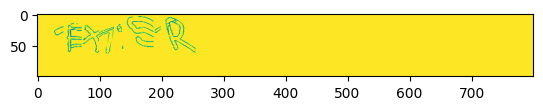

In [ ]:
def _render_signature(self, text: str) -> np.ndarray:
    """Render a single word with jitter, shear, overlap, and pressure effects."""
    font_path    = random.choice(self.fonts)
    font_size    = self.font_size
    image_size   = self.image_size
    text_color   = 0               # black ink
    bg_color     = 255             # white background
    rotation_deg = 5

    img = Image.new("L", image_size, bg_color)
    draw = ImageDraw.Draw(img)
    font = ImageFont.truetype(str(font_path), font_size)

    x_cursor = random.randint(int(font_size * 0.1), int(font_size * 0.5))

    # Create a baseline jitter sine wave
    wave_amplitude = font_size * 0.05
    wave_frequency = 2 * math.pi / max(1, len(text))

    for i, ch in enumerate(text):
        # Get character bounding box
        bbox   = font.getbbox(ch)
        char_w = bbox[2] - bbox[0]
        char_h = bbox[3] - bbox[1]

        # Simulated pen pressure: random stroke width
        stroke_width = random.randint(1, 3)

        # Character mask
        mask = Image.new("L", (char_w + 4, char_h + 4), bg_color)
        draw_mask = ImageDraw.Draw(mask)
        draw_mask.text((-bbox[0] + 2, -bbox[1] + 2), ch, font=font,
                       fill=text_color, stroke_width=stroke_width)

        # Shear (slant) transformation matrix
        shear_amount = random.uniform(-0.25, 0.25)
        matrix = (1, shear_amount, 0, 0, 1, 0)  # Affine shear in x-direction
        mask = mask.transform(
            (mask.width, mask.height), Image.AFFINE, matrix, fillcolor=bg_color
        )

        # Rotation
        mask = mask.rotate(
            random.randint(-rotation_deg, rotation_deg),
            resample=Image.BICUBIC,
            expand=True,
            fillcolor=bg_color
        )

        # Vertical position using sine wave jitter
        y_base = int(image_size[1] * 0.4 + wave_amplitude * math.sin(i * wave_frequency))

        # Paste with transparency
        img.paste(mask, (x_cursor, y_base - mask.size[1] // 2), mask)

        # Cursive linking: reduced spacing and overlap
        spacing = mask.size[0] - random.randint(int(font_size * 0.15), int(font_size * 0.4))
        x_cursor += max(5, spacing)
    plt.imshow(img)
    return np.array(img, dtype=np.uint8)
_render_signature(self, "text: str")

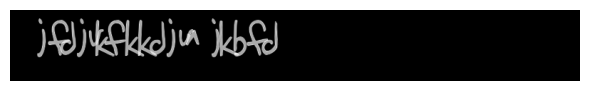

In [ ]:
# ---- parameters that already exist in your class ----
text         = "jfdjvkfkkdjvnjkbfd"
font_path    = random.choice(self.fonts)
font_size    = self.font_size
image_size   = self.image_size          # e.g. (800, 100)
text_color   = 180                      # white ink on black background
bg_color     = 0                        # pure black background
rotation_deg = 5

# ---- canvas: single‑channel (“L”) image ----
img = Image.new("L", image_size, bg_color)
draw = ImageDraw.Draw(img)
font = ImageFont.truetype(str(font_path), font_size)

# heuristic starting point
x_cursor = random.randint(int(font_size * 0.1), int(font_size * 0.5))
y_base   = int(image_size[1] * 0.4)

for ch in text:
    bbox   = font.getbbox(ch)
    char_w = bbox[2] - bbox[0]
    char_h = bbox[3] - bbox[1]
    # mask: white glyph (ink) on black background
    mask = Image.new("L", (char_w, char_h), 0)
    ImageDraw.Draw(mask).text((-bbox[0], -bbox[1]), ch, font=font, fill=text_color)

    # rotate the glyph mask
    mask = mask.rotate(random.randint(-rotation_deg, rotation_deg), resample=Image.BICUBIC, expand=True)

    # paste onto canvas using 'mask' both as image and mask ⇒ transparent background
    img.paste(mask, (x_cursor, y_base - mask.size[1] // 2), mask)

    # advance cursor
    x_cursor +=  random.randint(int(font_size * 0.1), int(font_size * 0.4))

# numpy view if you still need it downstream
img_np = np.array(img, dtype=np.uint8)

plt.figure(figsize=(6, 2))
plt.imshow(img_np, cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()

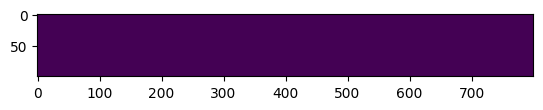

In [ ]:
        text="jfdjvkfkkdjvnjkbfd"
        img = Image.new("L", self.image_size, 255)
        draw = ImageDraw.Draw(img)

        font_path = random.choice(self.fonts)
        font = ImageFont.truetype(str(font_path), self.font_size)

        # heuristic positioning
        x_cursor = random.randint(int(self.font_size * 0.1), int(self.font_size * 0.5))
        y_base = int(self.image_size[1] * 0.4)

        # draw each character separately, allowing random rotation
        for ch in text:
            rotated = Image.new("L", self.image_size, 255)
            ImageDraw.Draw(rotated).text((0, 0), ch, font=font, fill=self.text_color)
            rotated = rotated.rotate(random.randint(-5, 5), resample=Image.BICUBIC, expand=True )
            img.paste(rotated, (x_cursor, y_base), rotated)
            x_cursor += rotated.size[0] + random.randint(0, int(self.font_size * 0.15))
        # convert to grayscale
        img_np = np.array(img.convert("L"))
        # distort / noise
        # img_np = self._distort_high_values(img_np)
        # img_np = self._add_noise(img_np)
        plt.imshow(img_np)

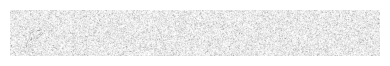

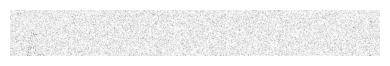

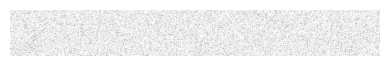

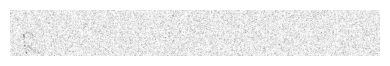

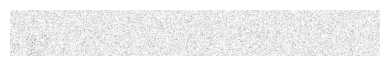

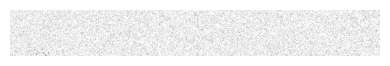

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 100, 80,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_2       │ (None, 100, 80,   │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ base_cnn            │ (None, 128)       │  6,857,600 │ input_layer_1[0]… │
│ (Functional)        │                   │            │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 128)       │          0 │ base_cnn[0][0],   │
│                     │                   │            │ base_cnn[1][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1)         │        129 │ lambda[0][0]      │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 6,857,729 (26.16 MB)

 Trainable params: 6,857,729 (26.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3


ValueError: Input 0 of layer "functional_1" is incompatible with the layer: expected shape=(None, 100, 80, 1), found shape=(None, 100, 800)

In [ ]:
# ═════════════════════════════════════════════════════════════════════════════
#  3.  Handy CLI driver  (optional)
# ═════════════════════════════════════════════════════════════════════════════
if __name__ == "__main__":
    # quick smoke-test
    gen = Signature_Generator()
    gen.remove_all()
    files = gen.create_multiple(n_samples=6, show=True)

    # build positive/negative pairs
    pos_pairs = [(a, b, 1) for i, a in enumerate(files) for b in files[i + 1 :]]
    neg_pairs = []
    # generate a few random counterfeit examples for negatives
    for fp in files[: len(files) // 2]:
        fake = gen._random_string(6)  # random name
        fake_path, _ = gen.create_signature(output_file=f"{fake}.png", show=False)
        neg_pairs.append((fp, fake_path, 0))

    pairs_df = pd.DataFrame(pos_pairs + neg_pairs, columns=["file_A", "file_B", "label"])
    net = Signature_Siamese_Network(network_name="base_cnn")
    hist = net.fit(pairs_df, epochs=3, batch_size=4)
    net.plot_history(hist)

In [ ]:
#!/usr/bin/env python3
# ──────────────────────────────────────────────────────────────────────────────
#  Signature Generation & Verification Toolkit
#  • Synthetic-signature generator with rich distortion / noise pipeline
#  • Flexible Siamese network that can use a tiny CNN, ResNet-50 embedding, #    or a ViT-style transformer as its feature extractor
# ──────────────────────────────────────────────────────────────────────────────
#https://www.1001fonts.com/handwriting+messy-fonts.html?page=15
import os
import random,math
import string
from pathlib import Path
from typing import List, Tuple, Optional
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from joblib import Parallel, delayed
from IPython.display import clear_output
from sklearn.utils.validation import joblib
import tensorflow as tf
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from sklearn.model_selection import train_test_split
target_folder = "/content/drive/MyDrive/Projects/Signatures/"


def generate_random_string(length=np.random.randint(4, 16), use_digits=True, use_letters=True):
    if length is None:
        length = random.randint(5, 10)
    characters = ""
    if use_letters:
        characters += string.ascii_letters  # a–z + A–Z
    if use_digits:
        characters += string.digits         # 0–9

    if not characters:
        raise ValueError("At least one of use_digits or use_letters must be True.")

    return "".join(random.choice(characters) for _ in range(length))



# ═════════════════════════════════════════════════════════════════════════════
#  1.  Synthetic signature generator
# ═════════════════════════════════════════════════════════════════════════════
class Signature_Generator:
    """
    Creates printable PNG images that look like hand-written signatures, with optional geometric distortions and four noise types:
    gaussian | salt_pepper | scatter_high | none
    """

    # ────────────────────────────────────────────────────────────────────────
    #  Construction helpers
    # ────────────────────────────────────────────────────────────────────────
    @staticmethod
    def _levenshtein_index(s1: str, s2: str) -> int:
        """Classic DP edit-distance but trimmed to similarity count only."""
        n1, n2 = len(s1), len(s2)
        n=np.abs(n1-n2)
        if n1>n2:
            s2=s2+" "*n
        else:
            s1=s1+" "*n

        dp = np.sum([s1[i]==s2[i] for i in range(n1)])
        return dp/len(s1)

    @staticmethod
    def _random_string(length: int = 10, use_digits: bool = True, use_letters: bool = True, ) -> str:
        chars = ""
        if use_letters:
            chars += string.ascii_letters
        if use_digits:
            chars += string.digits
        if not chars:
            raise ValueError("At least one of use_digits/use_letters must be True")
        return "".join(random.choice(chars) for _ in range(length))

    @staticmethod
    def _similar_strings(base: str, num_variants: int = 5, num_changes: int = 2, ) -> List[str]:
        variants = []
        for _ in range(num_variants):
            s = list(base)
            idx = random.sample(range(len(s)), min(num_changes, len(s)))
            for i in idx:
                s[i] = random.choice(string.ascii_letters + string.digits)
            variants.append("".join(s))
        variants=[base]+variants
        return variants

    # ────────────────────────────────────────────────────────────────────────
    #  InitialiserD:\Projects\SignatureProject\signature.py
    # ────────────────────────────────────────────────────────────────────────
    def __init__(self, name: str = "Rauf Giwa",
                 target_folder: str = target_folder,
                 signatures_folder: str = "Signatures/",
                 font_folder: str = "Fonts/", dpi: int = 80, image_size: Tuple[int, int] = (400, 100),
                 font_size: int = 80, text_color: str = "black", background_color: Tuple[int, int, int, int] = (255, 255, 255, 0),
                 noise_type: str = "gaussian", distortion_factor: float = 1.5, scatter_radius: int = 15, scatter_points: int = 25,
                 threshold: int = 200, salt_vs_pepper: float = 0.1, salt_pepper_vol: float = 0.0005, noise_amount: int = 25,
                 mean: float = 0.0, sigma: float = 25.0, ):
        self.name = name
        self.target_folder = target_folder
        self.signatures_folder = target_folder+signatures_folder
        self.font_folder = target_folder+font_folder
        print(self.font_folder)

        Path(self.signatures_folder).mkdir(parents=True, exist_ok=True)

        self.fonts = [f"{self.font_folder}{f}" for f in os.listdir(self.font_folder) if f.split(".")[-1].lower() in ("ttf", "otf")]
        if not self.fonts:
            raise RuntimeError("No fonts found in {}".format(font_folder))

        self.dpi = dpi
        self.image_size = image_size
        self.font_size = font_size
        self.text_color = text_color
        self.background_color = background_color

        self.noise_type = noise_type.lower()
        self.distortion_factor = distortion_factor
        self.scatter_radius = scatter_radius
        self.scatter_points = scatter_points
        self.threshold = threshold
        self.salt_vs_pepper = salt_vs_pepper
        self.salt_pepper_vol = salt_pepper_vol
        self.noise_amount = noise_amount
        self.mean = mean
        self.sigma = sigma
        self.pct_changes=[0.2,0.4,0.6,0.8,1.0]
        self.num_variants=5
        # interpolation options for visual inspection
        self.methods = [
            None, "none", "nearest", "bilinear", "bicubic", "spline16", "spline36", "hanning", "hamming", "hermite", "kaiser", "quadric", "catrom", "gaussian", "bessel", "mitchell", "sinc", "lanczos", ]

    # ────────────────────────────────────────────────────────────────────────
    #  Noise / distortion utilities
    # ────────────────────────────────────────────────────────────────────────
    def _scatter_high_values(self, img_np: np.ndarray) -> np.ndarray:
        """Randomly scatter the brightest pixels within a local radius."""
        scattered = img_np.copy()
        ys, xs = np.where(img_np > self.threshold)
        coords = list(zip(ys, xs))
        random.shuffle(coords)
        height, width = img_np.shape[:2]
        for (y, x) in coords[: self.scatter_points]:
            dy = random.randint(-self.scatter_radius, self.scatter_radius)
            dx = random.randint(-self.scatter_radius, self.scatter_radius)
            ny, nx = y + dy, x + dx
            if 0 <= ny < height and 0 <= nx < width:
                scattered[ny, nx] = img_np[y, x]
        return scattered

    def _distort_high_values(self, img_np: np.ndarray) -> np.ndarray:
        """Multiply the brightest pixels by distortion_factor (clipped)."""
        distorted = img_np.copy()
        mask = distorted > self.threshold
        distorted[mask] = np.clip(distorted[mask] * self.distortion_factor, 0, 255
        )
        return distorted.astype(np.uint8)

    def _add_gaussian_noise(self, img_np: np.ndarray) -> np.ndarray:
        gauss = np.random.normal(self.mean, self.sigma, img_np.shape)
        noisy = np.clip(img_np.astype(np.int16) + gauss, 0, 255)
        return noisy.astype(np.uint8)

    def _add_salt_pepper_noise(self, img_np: np.ndarray) -> np.ndarray:
        noisy = img_np.copy()
        total = np.prod(img_np.shape[:2])
        num_salt = int(self.noise_amount * total * self.salt_vs_pepper)
        num_pepper = int(self.noise_amount * total * (1 - self.salt_vs_pepper))

        # salt
        ys = np.random.randint(0, img_np.shape[0], num_salt)
        xs = np.random.randint(0, img_np.shape[1], num_salt)
        noisy[ys, xs] = 255
        # pepper
        ys = np.random.randint(0, img_np.shape[0], num_pepper)
        xs = np.random.randint(0, img_np.shape[1], num_pepper)
        noisy[ys, xs] = 0
        return noisy

        if self.noise_type == "scatter_high":
            return self._scatter_high_values(img_np)

        return img_np
    def _add_noise(self, img_np: np.ndarray) -> np.ndarray:
        noisy = img_np.copy()
        if "gaussian" in self.noise_type:
            noisy = self._add_gaussian_noise(noisy)
        if "salt_pepper" in self.noise_type:
            noisy = self._add_salt_pepper_noise(noisy)
        if "scatter_high" in self.noise_type:
            noisy = self._scatter_high_values(noisy)
        return noisy
    # ────────────────────────────────────────────────────────────────────────
    #  Core image-generation routine
    # ────────────────────────────────────────────────────────────────────────
    # def _render_signature(self, text: str) -> np.ndarray:
    #     """Render a single word onto an RGBA canvas, return grayscale np.uint8."""
    #     font_path    = random.choice(self.fonts)
    #     font_size    = self.font_size
    #     image_size   = self.image_size          # e.g. (800, 100)
    #     text_color   = 0                      # white ink on black background
    #     bg_color     = 255                        # pure black background
    #     rotation_deg = 5
    #     # ---- canvas: single‑channel (“L”) image ----
    #     img = Image.new("L", image_size, bg_color)
    #     draw = ImageDraw.Draw(img)
    #     font = ImageFont.truetype(str(font_path), font_size)

    #     # heuristic starting point
    #     x_cursor = random.randint(int(font_size * 0.1), int(font_size * 5))
    #     y_base   = int(image_size[1] * 0.4)
    #     for ch in text:
    #         bbox   = font.getbbox(ch)
    #         char_w = bbox[2] - bbox[0]
    #         char_h = bbox[3] - bbox[1]
    #         mask = Image.new("L", (char_w, char_h), bg_color)
    #         ImageDraw.Draw(mask).text((-bbox[0], -bbox[1]), ch, font=font, fill=text_color,stroke_fill=text_color,embedded_color=text_color)
    #         mask = mask.rotate(random.randint(-rotation_deg, rotation_deg), resample=Image.BICUBIC, expand=True,fillcolor=bg_color        )
    #         img.paste(mask, (x_cursor, y_base - mask.size[1] // 2), mask)
    #         x_cursor +=  random.randint(int(font_size * 0.1), int(font_size * 0.4))
    #     img_np = np.array(img, dtype=np.uint8)
    #     img_np = self._add_noise(img_np)
    #     return img_np


    # 1. Simulate variable stroke width (pen pressure)
    def _apply_stroke(self, ch, font, bbox, stroke_width, text_color, bg_color):
        char_w = bbox[2] - bbox[0]
        char_h = bbox[3] - bbox[1]
        mask = Image.new("L", (char_w + 4, char_h + 4), bg_color)
        draw_mask = ImageDraw.Draw(mask)
        draw_mask.text((-bbox[0] + 2, -bbox[1] + 2), ch, font=font,
                    fill=text_color, stroke_width=stroke_width,stroke_fill=text_color)
        return mask

    # 2. Apply shear (slant transformation)
    def _apply_shear(self, img, shear_amount, bg_color,text_color):
        matrix = (1, shear_amount, 0, 0, 1, 0)
        return img.transform(img.size, Image.AFFINE, matrix, fillcolor=bg_color)

    # 3. Apply rotation (for handwritten variation)
    def _apply_rotation(self, img, rotation_deg, bg_color,text_color):
        return img.rotate(
            random.randint(-rotation_deg, rotation_deg),
            resample=Image.BICUBIC,
            expand=True,
            fillcolor=bg_color
        )

    # 4. Compute vertical jitter (baseline sine wave)
    def _baseline_y(self, i, image_height, font_size, total_chars):
        wave_amplitude = font_size * 0.05
        wave_frequency = 2 * math.pi / max(1, total_chars)
        return int(image_height * 0.4 + wave_amplitude * math.sin(i * wave_frequency))

    # 5. Cursive overlap spacing
    def _next_x_cursor(self, mask_width, font_size):
        spacing = mask_width - random.randint(int(font_size * 0.15), int(font_size * 0.4))
        return max(5, spacing)

    # Main signature rendering method
    def _render_signature(self, text: str) -> np.ndarray:
        font_path    = random.choice(self.fonts)
        font_size    = self.font_size
        image_size   = self.image_size
        text_color   = 225     # black
        bg_color     = 0   # white
        rotation_deg = 5

        font = ImageFont.truetype(str(font_path), font_size)
        img = Image.new("L", image_size, bg_color)
        draw = ImageDraw.Draw(img)

        x_cursor = random.randint(int(font_size * .5), int(font_size * 2))

        for i, ch in enumerate(text):
            bbox = font.getbbox(ch)
            # Simulate pressure
            stroke_width = random.randint(1, 3)
            mask = self._apply_stroke(ch, font, bbox, stroke_width, text_color, bg_color)
            # Slant
            shear_amt = random.uniform(-0.25, 0.25)
            mask = self._apply_shear(mask, shear_amt, bg_color, text_color)
            # Rotate
            mask = self._apply_rotation(mask, rotation_deg, bg_color, text_color)
            # Baseline jitter
            y_base = self._baseline_y(i, image_size[1], font_size, len(text))
            # Paste character
            img.paste(mask, (x_cursor, y_base - mask.size[1] // 2), mask)
            # Overlap (cursive effect)
            x_cursor += self._next_x_cursor(mask.size[0], font_size)
        img=img.convert("L")
        img=np.array(img, dtype=np.uint8)
        img=self._add_noise(img)
        return 255-np.array(img, dtype=np.uint8)


    # ────────────────────────────────────────────────────────────────────────
    #  Public helpers
    # ────────────────────────────────────────────────────────────────────────
    def remove_all(self) -> None:
        """Delete every PNG inside self.signatures_folder."""
        for f in Path(self.signatures_folder).glob("*.png"):
            f.unlink(missing_ok=True)

    def create_signature(self,text, file_nos=0, show: bool = False, ):
        file_path = f"{self.signatures_folder}{text}_{file_nos}.png"
        image_np = self._render_signature(self.name)
        Image.fromarray(image_np).save(file_path)
        if show:
            plt.figure(figsize=(4, 1))
            plt.imshow(image_np, cmap="gray")
            plt.axis("off")
            plt.tight_layout()
            plt.show()
        return str(file_path), image_np

    def create_multiple(self, show: bool = False, ):
        """Generate several variants of the base name."""
        base_variants=[]
        for p in self.pct_changes:
            num_changes=int(len(self.name)*p)
            base_variants=base_variants+self._similar_strings(self.name, num_variants=self.num_variants, num_changes=num_changes, )
        for text in base_variants:
            for k in range(np.random.random_integers(3,7)):
                self.create_signature(text, file_nos=k)
        self.base_variants=base_variants
        return base_variants
        files = []
        for variant in self.base_variants:
            path, _ = self.create_signature(file_nos=f"{variant}.png", show=show)
            files.append(path)
        return files

    def ground_truth_score(self) -> pd.DataFrame:
        """Compute Levenshtein similarity between every generated PNG pair."""
        signatures=[filename for filename in os.listdir(self.signatures_folder)]
        signatures=pd.DataFrame([[u,v,self._levenshtein_index(u.split("_")[0],v.split("_")[0])] for u in  signatures for v in  signatures])
        signatures.columns=["Signature_1", "Signature_2", "similarity"]
        return signatures


# ═════════════════════════════════════════════════════════════════════════════
#  2.  Siamese network for signature verification
# ═════════════════════════════════════════════════════════════════════════════
class Signature_Siamese_Network:
    """
    Flexible Siamese architecture. Call with network_name =
        'base_cnn'  → small 3-layer CNN
        'resnet'    → ResNet-50 embedding (frozen)
        'transformer'→ ViT-style  patch encoder
    """

    # ────────────────────────────────────────────────────────────────────────
    #  Base encoders
    # ────────────────────────────────────────────────────────────────────────
    def _build_base_cnn(self, input_shape) -> Model:
        inputs = Input(shape=input_shape)
        x = layers.Conv2D(64, (3, 3), activation="relu")(inputs)
        x = layers.MaxPooling2D()(x)
        x = layers.Conv2D(128, (3, 3), activation="relu")(x)
        x = layers.MaxPooling2D()(x)
        x = layers.Flatten()(x)
        x = layers.Dense(128, activation="relu")(x)
        return Model(inputs, x, name="base_cnn")

    def _build_resnet_embedding(self, input_shape) -> Model:
        base = ResNet50(weights=None, include_top=False, input_shape=input_shape)
        base.trainable = False
        inputs = Input(shape=input_shape)
        x = base(inputs, training=False)
        x = layers.GlobalAveragePooling2D()(x)
        x = layers.Dense(256, activation="relu")(x)
        x = layers.BatchNormalization()(x)
        return Model(inputs, x, name="resnet")

    def _build_transformer(self, input_shape) -> Model:
        patch_size = 20
        projection_dim = 64
        num_heads = 4
        ff_dim = 128
        num_layers = 4

        inputs = Input(shape=input_shape)
        num_patches = (input_shape[0] // patch_size) * (input_shape[1] // patch_size)

        # patch extraction
        patches = tf.image.extract_patches(images=tf.expand_dims(inputs, axis=0), sizes=[1, patch_size, patch_size, 1], strides=[1, patch_size, patch_size, 1], rates=[1, 1, 1, 1], padding="VALID", )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, (-1, num_patches, patch_dims))
        x = layers.Dense(projection_dim)(patches)

        # transformer encoder blocks
        for _ in range(num_layers):
            x1 = layers.LayerNormalization()(x)
            attn_out = layers.MultiHeadAttention(num_heads=num_heads, key_dim=projection_dim
            )(x1, x1)
            x2 = layers.Add()([x, attn_out])
            x3 = layers.LayerNormalization()(x2)
            x3 = layers.Dense(ff_dim, activation="relu")(x3)
            x3 = layers.Dense(projection_dim)(x3)
            x = layers.Add()([x2, x3])

        x = layers.GlobalAveragePooling1D()(x)
        x = layers.Dense(256, activation="relu")(x)
        x = layers.BatchNormalization()(x)
        return Model(inputs, x, name="transformer")

    # ────────────────────────────────────────────────────────────────────────
    #  Siamese wrapper
    # ────────────────────────────────────────────────────────────────────────
    def _build_siamese(self) -> Model:
        lookup = {
            "base_cnn": self._build_base_cnn, "resnet": self._build_resnet_embedding, "transformer": self._build_transformer, }
        if self.network_name not in lookup:
            raise ValueError(f"network_name must be one of {list(lookup)}")
        encoder = lookup[self.network_name](self.input_shape)

        input_a = Input(shape=self.input_shape)
        input_b = Input(shape=self.input_shape)
        feat_a = encoder(input_a)
        feat_b = encoder(input_b)

        diff = layers.Lambda(lambda t: tf.abs(t[0] - t[1]))([feat_a, feat_b])
        output = layers.Dense(1, activation="sigmoid")(diff)

        return Model(inputs=[input_a, input_b], outputs=output)

    # ────────────────────────────────────────────────────────────────────────
    #  Public API
    # ────────────────────────────────────────────────────────────────────────
    def __init__(self, input_shape: Tuple[int, int, int] = (32, 400, 1),
                 target_folder: str = target_folder,
                 signatures_folder: str = "Signatures/",
                 loss: str = "binary_crossentropy", network_name: str = "base_cnn",  ):
        self.target_folder = target_folder
        self.signatures_folder = target_folder+signatures_folder
        self.input_shape = input_shape
        self.loss = loss
        self.network_name = network_name
        # self.signatures_folder = Path(signatures_folder)
        self.model = self._build_siamese()
        self.model.compile(loss=loss, optimizer=Adam(), metrics=["accuracy"])
        # self.model.summary()

        self.Signature_1 = "Signature_1"
        self.Signature_2 = "Signature_2"
        self.y = "y"
        self.loss = loss
        self.loss = loss
        self.loss = loss
    def save(self):
        config = {
        "input_shape": self.input_shape,
        "network_name": self.network_name,
        "target_folder": self.target_folder,
        "signatures_folder": self.signatures_folder,
        "loss": self.loss,
        "Signature_1": self.Signature_1,
        "Signature_2": self.Signature_2,
        "y": self.y,
        }
        joblib.dump(config,self.target_folder+"siamese.data")
        self.model.save(self.target_folder+"siamese.h5")

    def load(self):


        config=joblib.load(self.target_folder+"siamese.data")
        self.input_shape=config['input_shape']
        self.network_name=config['network_name']
        self.target_folder=config['target_folder']
        self.signatures_folder=config['signatures_folder']
        self.loss=config['loss']
        self.Signature_1=config['Signature_1']
        self.Signature_2=config['Signature_2']
        self.y=config['y']
        self.model = self.model.load(self.target_folder+"siamese.h5")



    # ────────────────────────────────────────────────────────────────────────
    #  Training helpers
    # ────────────────────────────────────────────────────────────────────────
    def _train_val_split(self, images: List[np.ndarray], labels: List[int], frac=0.2):
        idx = np.arange(len(images))
        np.random.shuffle(idx)
        split = int(len(idx) * (1 - frac))
        train_idx, val_idx = idx[:split], idx[split:]
        X_train, y_train = np.array(images)[train_idx], np.array(labels)[train_idx]
        X_val, y_val = np.array(images)[val_idx], np.array(labels)[val_idx]
        return X_train, y_train, X_val, y_val

    def load_gray(self,path):
        return np.array(Image.open(path).convert("L"), dtype=np.uint8)
    def return_images(self,Train):
        X=None
        y=None
        if Train is not None:
            img_A = np.stack([self.load_gray(self.signatures_folder+f) for f in Train[self.Signature_1]],axis=0) / 255.0
            img_B = np.stack([self.load_gray(self.signatures_folder+f) for f in Train[self.Signature_2]],axis=0) / 255.0
            y = Train[self.y].values.reshape(-1, 1)
            X=[img_A,img_B]
        return X,y

    def fit(self, Train: pd.DataFrame,Valid: pd.DataFrame=None, epochs: int = 10, batch_size: int = 32, **kw):
        """
        `pairs` must be a DataFrame with columns ["file_A", "file_B", "label"]
        where label = 1 for "same" and 0 for "different".
        """
        X,y=self.return_images(Train)
        X_v,y_v=self.return_images(Valid)

        if Valid is not None:
            X_v,y_v=self.return_images(Valid)
            history = self.model.fit(X,y, validation_data=(X_v,y_v), epochs=epochs, batch_size=batch_size, **kw, )
        else:
            history = self.model.fit(X,y,   epochs=epochs, batch_size=batch_size, **kw, )


        return history
    def predict(self, data: pd.DataFrame,):
        X,y = self.return_images(data)
        pred = self.model.predict(X,)
        return pred.ravel()
    # ────────────────────────────────────────────────────────────────────────
    #  Evaluation plots
    # ────────────────────────────────────────────────────────────────────────
    @staticmethod
    def plot_history(history: tf.keras.callbacks.History) -> None:
        acc = history.history.get("accuracy", [])
        val_acc = history.history.get("val_accuracy", [])
        loss = history.history.get("loss", [])
        val_loss = history.history.get("val_loss", [])
        epochs = range(1, len(acc) + 1)

        plt.figure(figsize=(12, 5))

        # accuracy
        plt.subplot(1, 2, 1)
        plt.plot(epochs, acc, "bo-", label="Training Acc")
        if val_acc:
            plt.plot(epochs, val_acc, "ro-", label="Validation Acc")
        plt.title("Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Acc")
        plt.grid(True)
        plt.legend()

        # loss
        plt.subplot(1, 2, 2)
        plt.plot(epochs, loss, "bo-", label="Training Loss")
        if val_loss:
            plt.plot(epochs, val_loss, "ro-", label="Validation Loss")
        plt.title("Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.grid(True)
        plt.legend()

        plt.tight_layout()
        plt.show()

    # ────────────────────────────────────────────────────────────────────────
    #  Fourier helpers (handy for visual debugging)
    # ────────────────────────────────────────────────────────────────────────
    @staticmethod
    def fourier_transform(image_np: np.ndarray) -> np.ndarray:
        f = np.fft.fft2(image_np)
        return np.fft.fftshift(f)

    @staticmethod
    def inverse_fourier_transform(fshift: np.ndarray) -> np.ndarray:
        ishift = np.fft.ifftshift(fshift)
        img = np.fft.ifft2(ishift)
        return np.abs(img).astype(np.uint8)



